In [3]:
from sklearn.datasets import load_iris
import pandas as pd

iris_bunch = load_iris()

In [4]:
#Creating a dataframe

iris_df = pd.DataFrame(iris_bunch.data , columns = iris_bunch.feature_names)
iris_df["Class"] = iris_bunch.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris_df["Class"].value_counts()

2    50
1    50
0    50
Name: Class, dtype: int64

In [6]:
# Split the data into X & y

X = iris_df.drop("Class", axis=1)
y = iris_df["Class"]

In [9]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=21)

In [10]:
print("Shape of X_train is : ",X_train.shape)
print("Shape of X_test is : ",X_test.shape)
print("Shape of y_train is : ",y_train.shape)
print("Shape of y_test is : ",y_test.shape)

Shape of X_train is :  (112, 4)
Shape of X_test is :  (38, 4)
Shape of y_train is :  (112,)
Shape of y_test is :  (38,)


PCA always performs well in a normalized dataset.Hence, we are going to normalise our input numerical features.

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [13]:
print("Before Scaling")
print("======================================================")
print("X train : ", X_train)
print("X test : ", X_test)

Before Scaling
X train :       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
38                 4.4               3.0                1.3               0.2
101                5.8               2.7                5.1               1.9
149                5.9               3.0                5.1               1.8
136                6.3               3.4                5.6               2.4
113                5.7               2.5                5.0               2.0
..                 ...               ...                ...               ...
120                6.9               3.2                5.7               2.3
112                6.8               3.0                5.5               2.1
48                 5.3               3.7                1.5               0.2
4                  5.0               3.6                1.4               0.2
56                 6.3               3.3                4.7               1.6

[112 rows x 4 columns]
X test :      

In [15]:
print("After Scaling")
print("======================================================")
print(X_train_scaled)
print("*******************************************************")
print(X_test_scaled)

After Scaling
[[-1.73699699 -0.12573213 -1.3955311  -1.30301344]
 [-0.07016022 -0.85411135  0.73327907  0.88862754]
 [ 0.04889955 -0.12573213  0.73327907  0.75970748]
 [ 0.52513862  0.84544017  1.01338567  1.53322782]
 [-0.18921999 -1.33969749  0.67725775  1.01754759]
 [ 0.40607886 -0.3685252   0.2851085   0.11510719]
 [ 1.23949724  0.11706095  0.73327907  1.40430777]
 [-0.42733953  1.08823324 -1.3955311  -1.30301344]
 [-1.14169814  1.33102631 -1.33950978 -1.43193349]
 [-1.85605676 -0.12573213 -1.50757374 -1.43193349]
 [ 0.40607886 -2.06807671  0.39715114  0.37294731]
 [-1.26075791  0.84544017 -1.22746714 -1.30301344]
 [ 1.23949724  0.11706095  0.62123643  0.37294731]
 [-1.02263837  0.60264709 -1.33950978 -1.30301344]
 [ 1.0013777   0.11706095  0.34112982  0.24402725]
 [ 2.19197539 -1.09690442  1.74166283  1.40430777]
 [-0.18921999 -0.61131827  0.39715114  0.11510719]
 [-0.07016022 -0.85411135  0.17306586 -0.27165298]
 [-1.49887745  0.11706095 -1.28348846 -1.30301344]
 [-0.9035786   1.

# Implement PCA on the dataset 

In [16]:
from sklearn.decomposition import PCA

pca_model = PCA() #Instantiating an object for the PCA method


X_train_pca = pca_model.fit_transform(X_train_scaled)
X_test_pca = pca_model.fit_transform(X_test_scaled)

In [18]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(112, 4)
(38, 4)


In [17]:
pca_model.explained_variance_ratio_

array([0.69489568, 0.25830074, 0.04239017, 0.0044134 ])

From above we can infer that,

1. 69.48% of variance is captured by the first principal component
2. 25.83% of variance is captured by the second principal component
3. 4.23% of variance is captured by the third principal component
4. 0.4% of variance is captured by the fourth principal component

**If we add the variances captured by the first 2 principal components above, we find that the total variance captured by the first 2 principal components alone is a whopping 95%. So, it is enough if we build our machine learning model using the first 2 components itself.**

In [19]:
pca_model2 = PCA(n_components=2)


X_train_pca2 = pca_model2.fit_transform(X_train_scaled)
X_test_pca2 = pca_model2.fit_transform(X_test_scaled)

print(X_train_pca2.shape)
print(X_test_pca2.shape)

(112, 2)
(38, 2)


In [20]:
pca_model2.explained_variance_ratio_

array([0.69489568, 0.25830074])

By now, we have applied dimensionality reduction technique on the input original dataset and we have reduced the number of dimension from 4 to 2.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_neighbors = 4)
knn.fit(X_train_pca2, y_train)

KNeighborsClassifier(n_neighbors=4)

In [23]:
y_pred = knn.predict(X_test_pca2)

In [24]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.8421052631578947


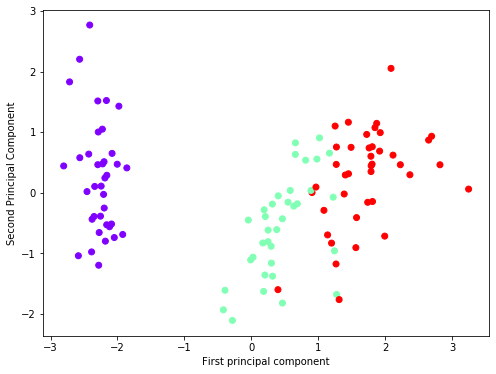

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca2[:,0],X_train_pca2[:,1],c=y_train,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

# End of discussion